<a href="https://colab.research.google.com/github/gueretamartin/datacademy/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualización y entrenamiento de un modelo de Regresión lineal con scikit-learn

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importando dependencias

In [44]:
import numpy as np
import pandas as pd # Manejo de datos
import seaborn as sns # Creación de gráficas y visualización de datos
import matplotlib.pyplot as plt # Dependencia para crear gráficos

## Explorando nuestro set de datos

In [10]:
df = pd.read_csv('/content/drive/MyDrive/Datacademy/studentsperformance.csv')


In [8]:
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [19]:
df.shape
df.columns
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

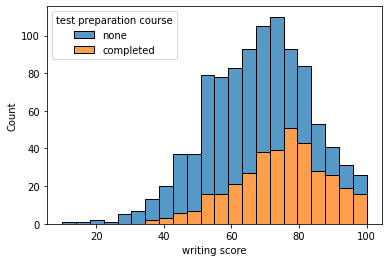

In [23]:
sns.histplot(data=df,x='writing score',hue='test preparation course',multiple='stack')

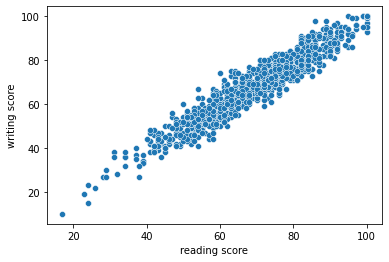

In [24]:
sns.scatterplot(data=df, x = 'reading score', y = 'writing score')

### Creando un histograma

In [38]:
freq = df['writing score'].value_counts()
df_freq  = freq.to_frame()
df_freq.reset_index(inplace=True)
df_freq.rename(columns={'index':'writing score','writing score': 'number of students'})

,writing score,number of students
0,74,35
1,70,33
2,68,31
3,73,28
4,62,27
...,...,...
72,23,1
73,22,1
74,19,1
75,15,1


### Promedio de los puntajes

In [41]:
df.mean()

math score       66.089
reading score    69.169
writing score    68.054
dtype: float64

### Mediana de los puntajes

In [12]:
df.median()

math score       66.0
reading score    70.0
writing score    69.0
dtype: float64

## Entrenando nuestro modelo

***x*** será el puntaje de lectura
y ***y*** sera el puntaje de escritura

Suponemos que si obtienen un buen puntaje en el test de lectura deben obtener un mayor puntaje en el test escritura

In [16]:
X = df['reading score'].values 
Y = df['writing score'].values 

X = X.reshape(-1,1)

# Dividir los datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test  = train_test_split(X,Y,test_size=0.2)

In [23]:
from sklearn.linear_model import LinearRegression 
reg = LinearRegression()
reg.fit(X_train,Y_train)

print('La pendiente es: ',reg.coef_)
print('El bias es: ',reg.intercept_)
print(reg.score(X_train,Y_train))

La pendiente es:  [0.99695897]
El bias es:  -0.9208027761794426
0.9095598733484475


## Visualización de nuestro modelo entrenado

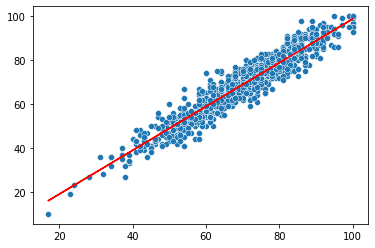

In [33]:
x_flat = X_train.flatten()

y_hat = reg.predict(X_train)
fig, ax  = plt.subplots()
sns.scatterplot(x = x_flat,y=Y_train)
plt.plot(X_train,y_hat,color='r')

## Evaluación de nuestro modelo

In [37]:
from sklearn.metrics import mean_squared_error

y_pred = reg.predict(X_test)
print('El error es: ',mean_squared_error(Y_test,y_pred))

El error es:  19.506112091050735


In [46]:
value = pd.DataFrame({'Actual test:': Y_test,'Predict: ': np.round(y_pred,0),'Error %: ':np.round(((Y_test-y_pred)/Y_test)*100,2)})
value

,Actual test:,Predict:,Error %:
0,52,53.0,-1.76
1,64,66.0,-2.93
2,66,63.0,4.72
3,93,92.0,1.29
4,81,74.0,8.83
...,...,...,...
195,80,81.0,-1.04
196,78,72.0,7.88
197,84,91.0,-8.09
198,70,67.0,4.47
